##  Lab 4-Implementation of Decision Tree on Iris dataset.

### Ussen Qarlygash, group - 2285

In [133]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [134]:
# Reading the dataset
#df = pd.read_csv('titanic.csv')
iris = datasets.load_iris()
X, y = iris.data, iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

In [135]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [137]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [138]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [139]:
df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']] = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']].replace(0, np.nan)


In [140]:
df.isnull().sum()

sepal length (cm)     0
sepal width (cm)      0
petal length (cm)     0
petal width (cm)      0
species              50
dtype: int64

In [141]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,100.000000
mean,5.843333,3.057333,3.758000,1.199333,1.500000
std,0.828066,0.435866,1.765298,0.762238,0.502519
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,1.500000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


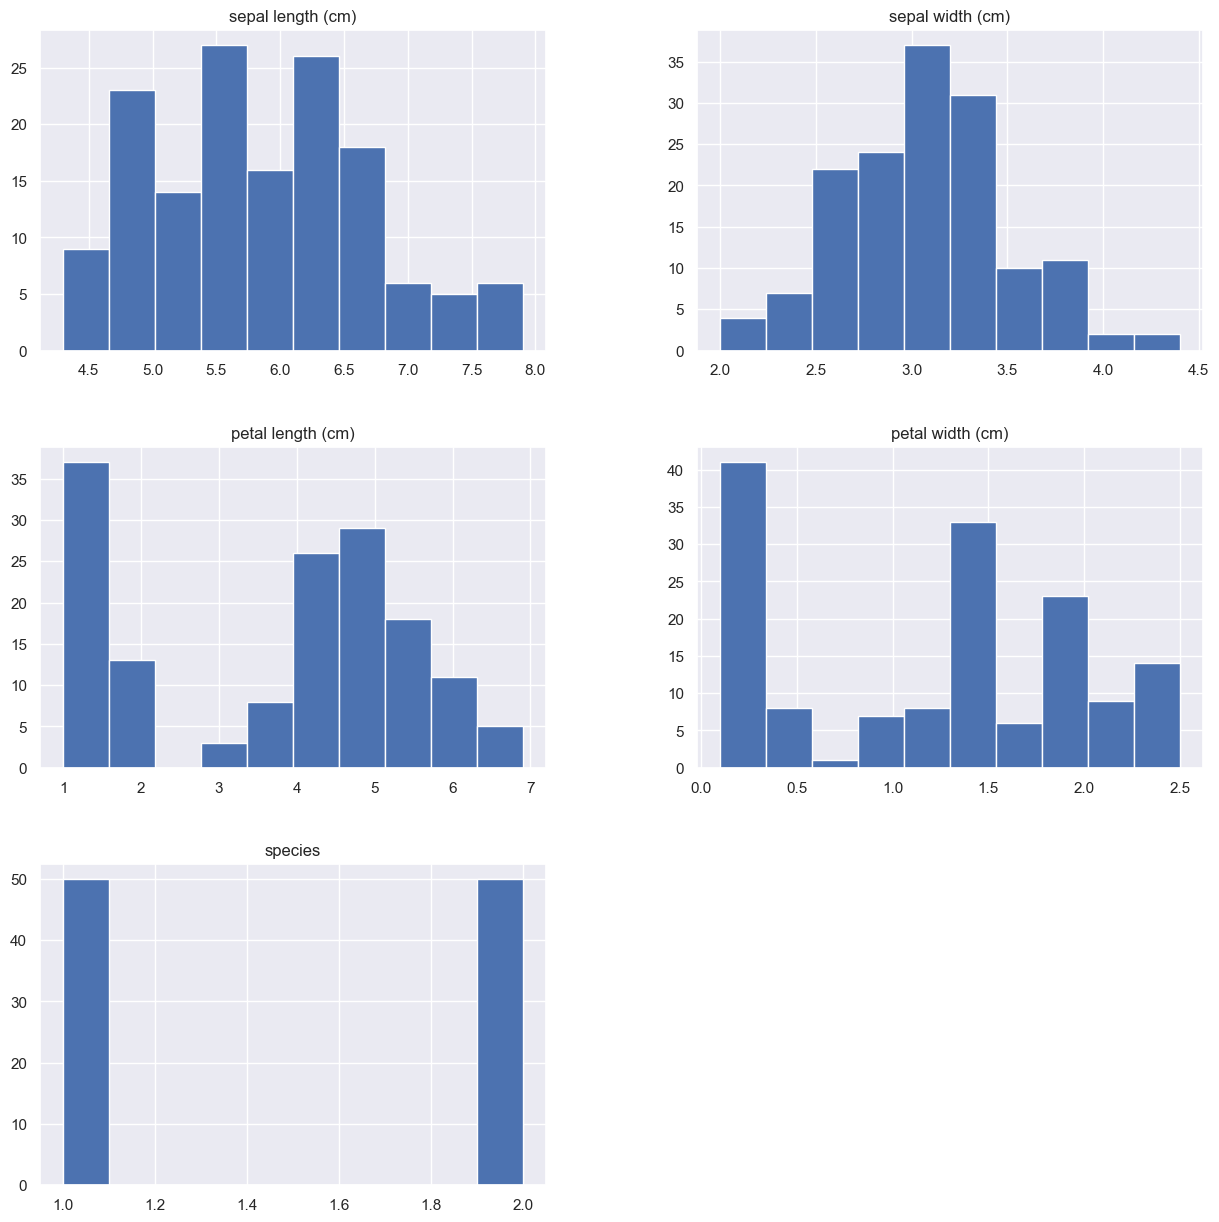

In [142]:
df.hist(figsize=(15,15));

In [143]:
df['sepal length (cm)'].fillna(df['sepal length (cm)'].mean(), inplace = True)
df['sepal width (cm)'].fillna(df['sepal width (cm)'].mean(), inplace = True)
df['petal length (cm)'].fillna(df['petal length (cm)'].median(), inplace = True)
df['petal width (cm)'].fillna(df['petal width (cm)'].median(), inplace = True)
# df['species'].fillna(df['species'].median(), inplace = True)
df.dropna(inplace=True)

In [144]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000,1.500000
std,0.662834,0.332751,0.825578,0.424769,0.502519
min,4.900000,2.000000,3.000000,1.000000,1.000000
25%,5.800000,2.700000,4.375000,1.300000,1.000000
50%,6.300000,2.900000,4.900000,1.600000,1.500000
75%,6.700000,3.025000,5.525000,2.000000,2.000000
max,7.900000,3.800000,6.900000,2.500000,2.000000


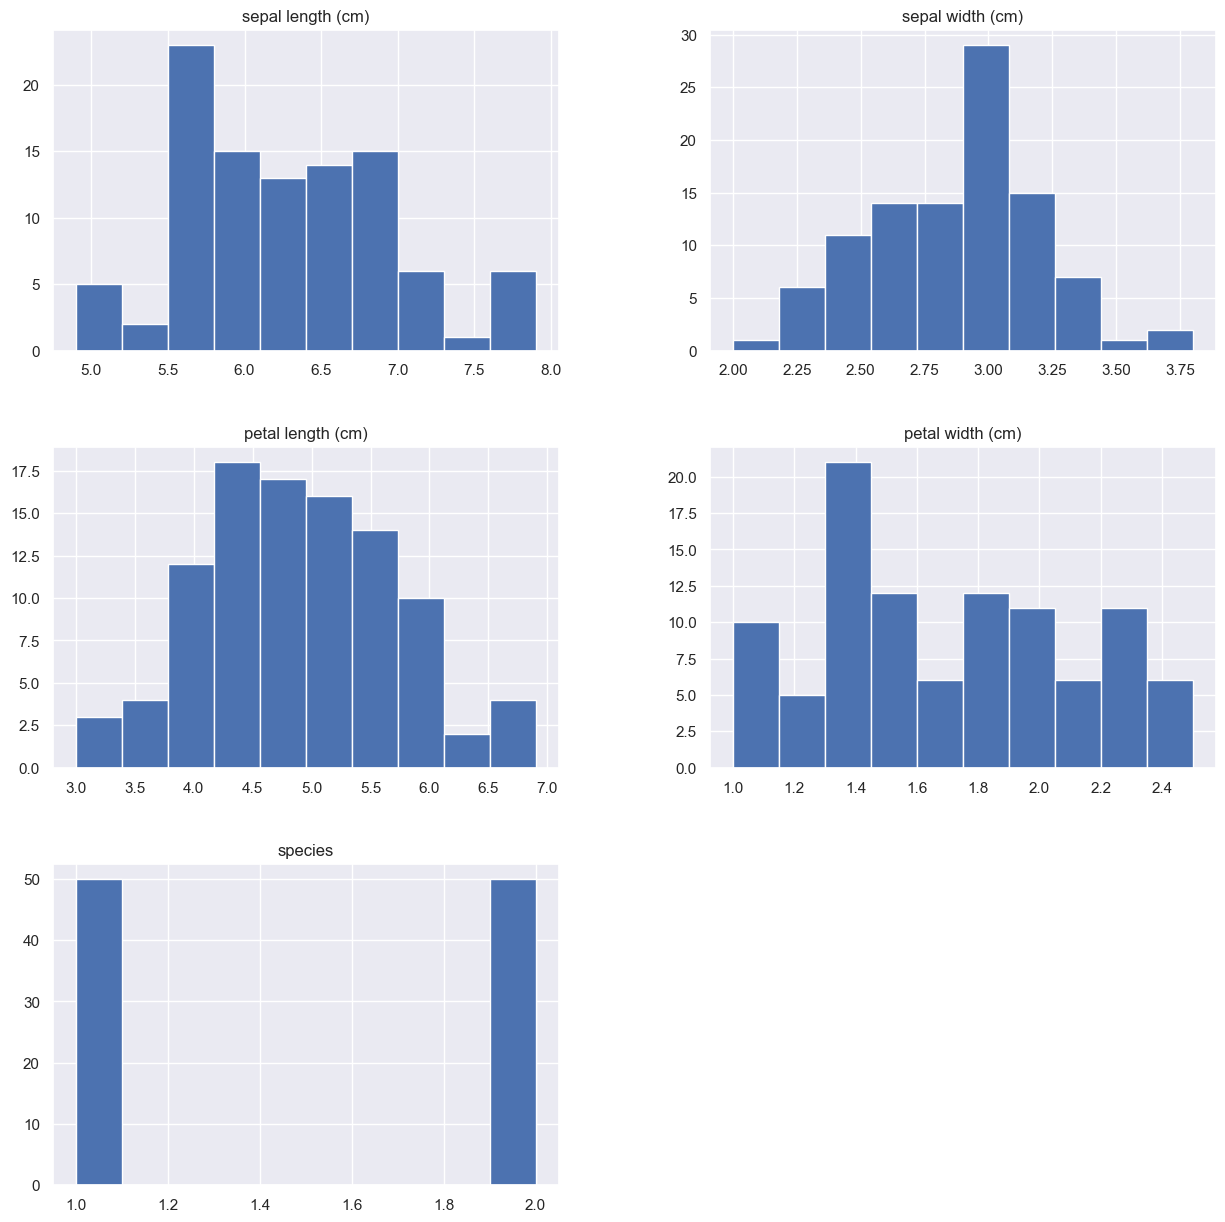

In [145]:
df.hist(figsize=(15,15));

In [146]:
df.corr()['species']

sepal length (cm)    0.494305
sepal width (cm)     0.308080
petal length (cm)    0.786424
petal width (cm)     0.828129
species              1.000000
Name: species, dtype: float64

<Axes: xlabel='sepal length (cm)', ylabel='count'>

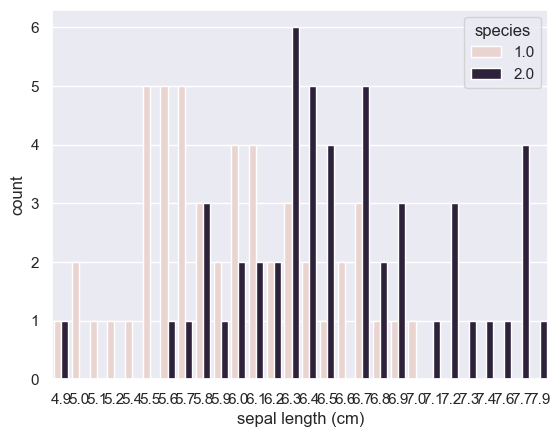

In [147]:
sns.countplot(data = df,x='sepal length (cm)',hue='species')

<Axes: ylabel='Density'>

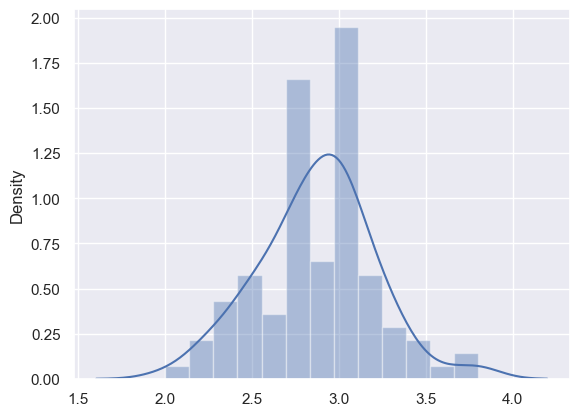

In [148]:
sns.distplot(x=df['sepal width (cm)'])

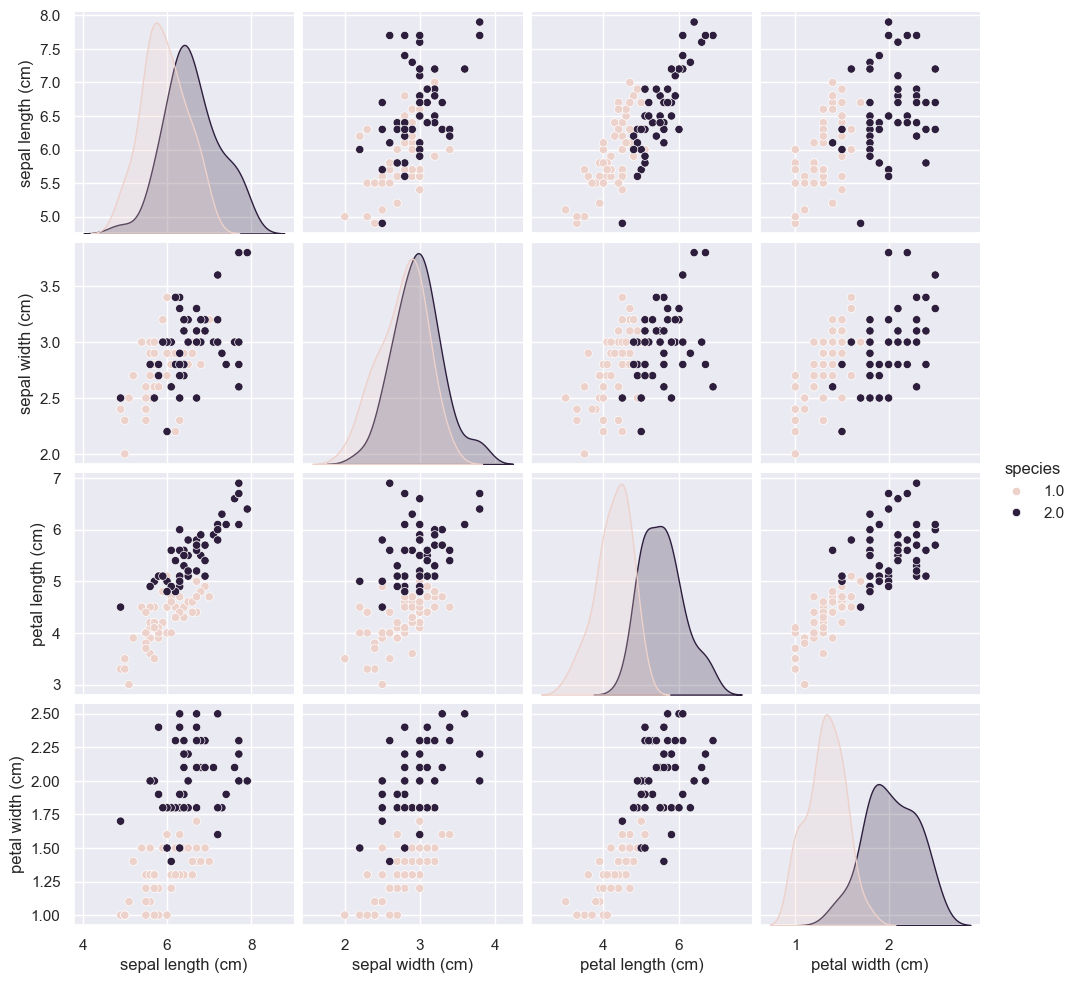

In [149]:
sns.pairplot(data = df,hue='species')

<Axes: >

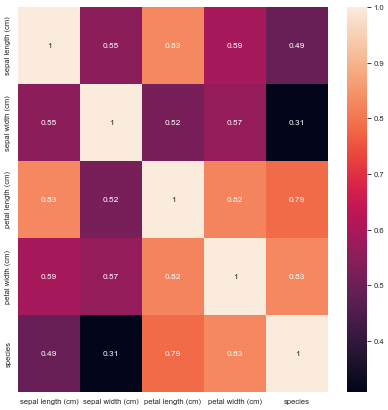

In [150]:
plt.figure(figsize=(10,10),dpi=50)
sns.heatmap(df.corr(),annot=True)

In [151]:
X = df.drop('species',axis=1)
y = df['species']

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [153]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=20)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.4, random_state=33)
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [155]:
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.fit_transform(X2_test)

X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.fit_transform(X3_test)

X4_train_scaled = scaler.fit_transform(X4_train)
X4_test_scaled = scaler.fit_transform(X4_test)

# Appling Decision Tree

In [156]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [157]:
parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[10,40,50,55], 
              'max_depth':[2,4,8,9,10,11],
              'class_weight':('balanced', None),
#               'presort':(False,True),
             }


In [158]:
dt_model = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(dt_model, parameters)
# gsearch.cv_results_
#scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
#scores
# model.fit(X_train, y_train)

In [159]:
gsearch.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ('balanced', None),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 8, 9, 10, 11],
                         'min_samples_split': [10, 40, 50, 55]})

In [160]:
gsearch.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 2,
 'min_samples_split': 10}

In [161]:
model = gsearch.best_estimator_
model

DecisionTreeClassifier(class_weight='balanced', max_depth=2,
                       min_samples_split=10)

In [162]:
gsearch.fit(X2_train_scaled, y2_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ('balanced', None),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 8, 9, 10, 11],
                         'min_samples_split': [10, 40, 50, 55]})

In [163]:
gsearch.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 2,
 'min_samples_split': 40}

In [164]:
model2 = gsearch.best_estimator_
model2

DecisionTreeClassifier(class_weight='balanced', max_depth=2,
                       min_samples_split=40)

In [165]:
gsearch.fit(X3_train_scaled, y3_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ('balanced', None),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 8, 9, 10, 11],
                         'min_samples_split': [10, 40, 50, 55]})

In [166]:
gsearch.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 10}

In [167]:
model3 = gsearch.best_estimator_
model3

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_split=10)

In [168]:
gsearch.fit(X4_train_scaled, y4_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ('balanced', None),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 8, 9, 10, 11],
                         'min_samples_split': [10, 40, 50, 55]})

In [169]:
gsearch.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 2,
 'min_samples_split': 10}

In [170]:
model4 = gsearch.best_estimator_
model4

DecisionTreeClassifier(class_weight='balanced', max_depth=2,
                       min_samples_split=10)

In [171]:
scores = cross_val_score(model, X_train_scaled, y_train, cv=15, scoring='f1_macro')
scores

array([1.        , 1.        , 0.82857143, 0.82857143, 0.82857143,
       0.8       , 1.        , 1.        , 0.76190476, 0.8       ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [172]:
mean_accuracy = sum(scores)/len(scores)
mean_accuracy

0.9231746031746032

In [173]:
scores2 = cross_val_score(model2, X2_train_scaled, y2_train, cv=15, scoring='f1_macro')
scores2

array([1.        , 0.82857143, 1.        , 0.82857143, 1.        ,
       0.8       , 1.        , 1.        , 1.        , 0.76190476,
       1.        , 1.        , 0.76190476, 1.        , 1.        ])

In [174]:
mean_accuracy2 = sum(scores2)/len(scores2)
mean_accuracy2

0.932063492063492

In [175]:
scores3 = cross_val_score(model3, X3_train_scaled, y3_train, cv=15, scoring='f1_macro')
scores3

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.73333333, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.2       , 1.        , 1.        , 0.73333333])

In [176]:
mean_accuracy3 = sum(scores3)/len(scores3)
mean_accuracy3

0.9111111111111112

In [177]:
scores4 = cross_val_score(model4, X4_train_scaled, y4_train, cv=10, scoring='f1_macro')
scores4

array([1.        , 1.        , 1.        , 0.84444444, 0.84444444,
       0.84444444, 1.        , 1.        , 0.70833333, 0.84444444])

In [178]:
# best_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=20)

In [179]:
# scores = cross_val_score(best_model, X_train_scaled, y_train, cv=10, scoring='f1_macro')
# scores

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.207\ngini = 0.5\nsamples = 80\nvalue = [40.0, 40.0]'),
 Text(0.4, 0.5, 'x[2] <= 0.077\ngini = 0.201\nsamples = 46\nvalue = [40.0, 5.128]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.051\nsamples = 40\nvalue = [38.049, 1.026]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.437\nsamples = 6\nvalue = [1.951, 4.103]'),
 Text(0.8, 0.5, 'gini = -0.0\nsamples = 34\nvalue = [0.0, 34.872]')]

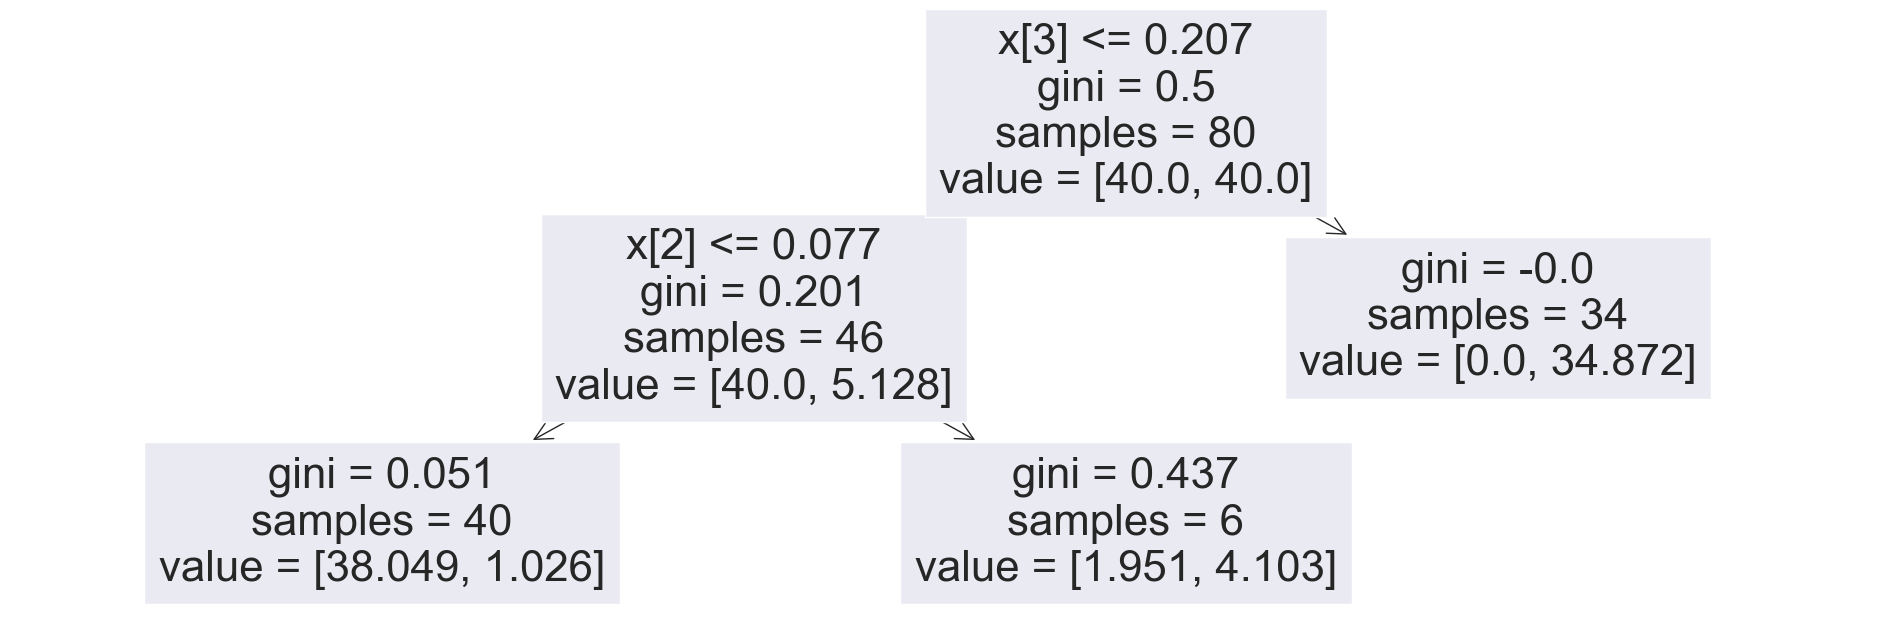

In [180]:
best_model11 = tree.DecisionTreeClassifier(criterion='gini',class_weight='balanced', max_depth=2, min_samples_split=37)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model11.fit(X_train_scaled,y_train))


In [181]:
y_pred = best_model11.predict(X_test_scaled)

In [182]:
confusion_matrix(y_test,y_pred)

array([[9, 0],
       [2, 9]], dtype=int64)

In [183]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.82      1.00      0.90         9
         2.0       1.00      0.82      0.90        11

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20



In [184]:
accuracy11 = best_model11.score(X_test_scaled,y_test) * 100
print(f'Accuracy: {accuracy11:.2f}%')

Accuracy: 90.00%


              precision    recall  f1-score   support

         1.0       0.82      1.00      0.90         9
         2.0       1.00      0.82      0.90        11

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20

Accuracy: 90.00%


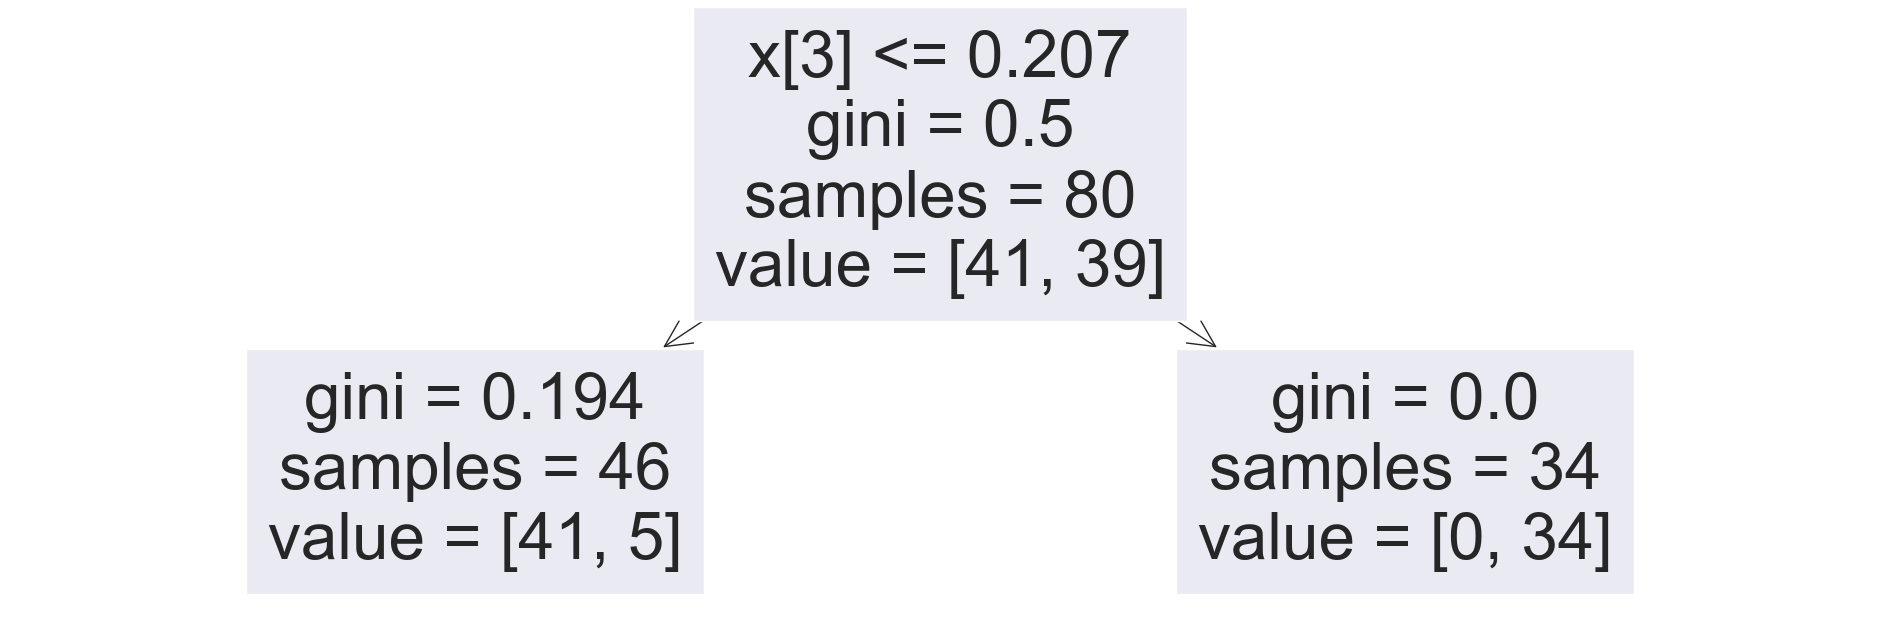

In [185]:
best_model12 = tree.DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_split=50)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model12.fit(X_train_scaled,y_train))
y_pred = best_model12.predict(X_test_scaled)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
accuracy12 = best_model12.score(X_test_scaled,y_test) * 100
print(f'Accuracy: {accuracy12:.2f}%')

              precision    recall  f1-score   support

         1.0       1.00      0.89      0.94         9
         2.0       0.92      1.00      0.96        11

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20

Accuracy: 95.00%


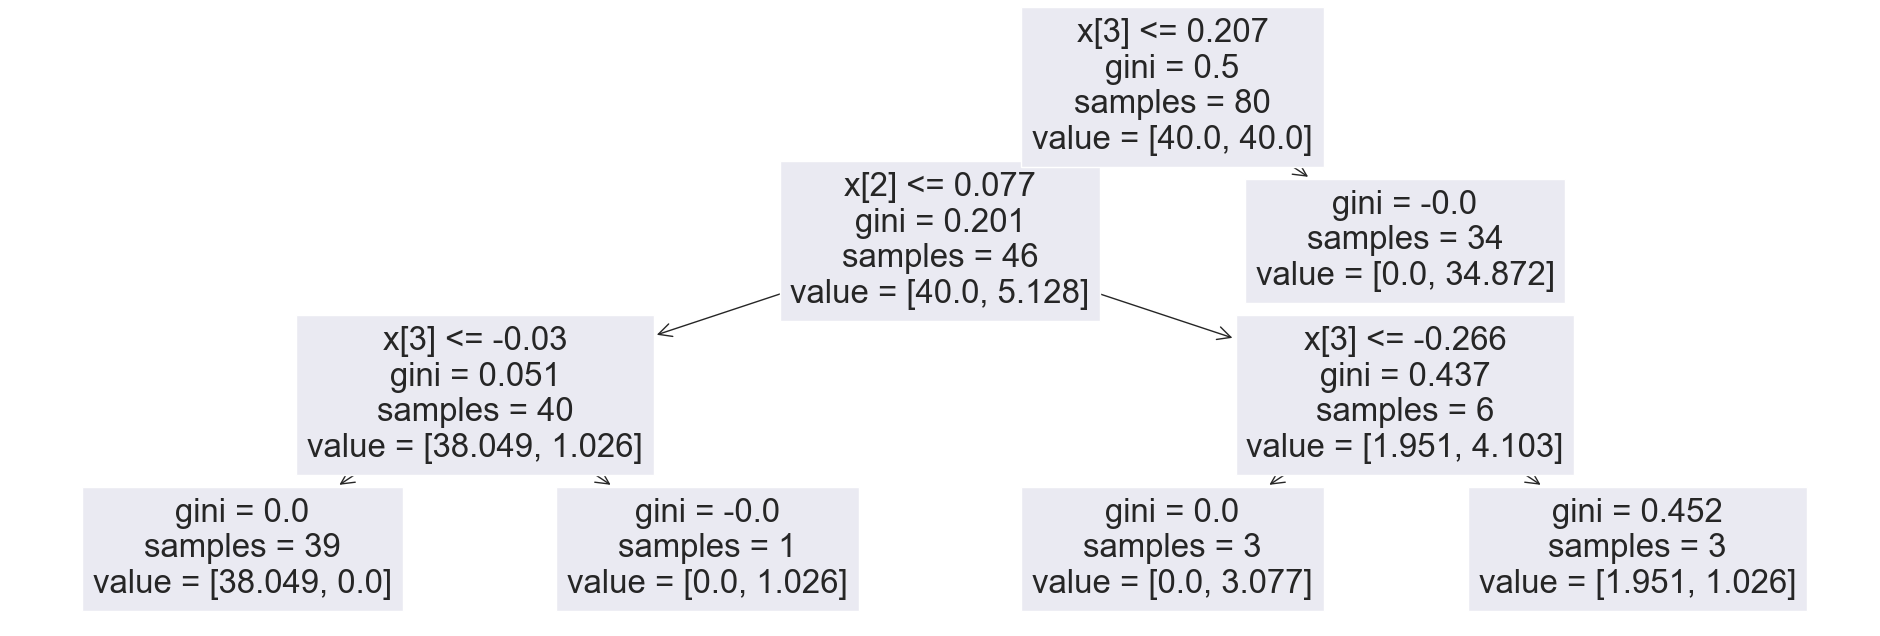

In [186]:
best_model13 = tree.DecisionTreeClassifier(criterion='gini',class_weight='balanced', max_depth=3, min_samples_split=3)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model13.fit(X_train_scaled,y_train))
y_pred = best_model13.predict(X_test_scaled)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
accuracy13 = best_model13.score(X_test_scaled,y_test) * 100
print(f'Accuracy: {accuracy13:.2f}%')

In [187]:
best_model21 = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=37)

[Text(0.4, 0.8333333333333334, 'x[2] <= -0.115\ngini = 0.5\nsamples = 80\nvalue = [40, 40]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.6, 0.5, 'x[3] <= 0.139\ngini = 0.13\nsamples = 43\nvalue = [3, 40]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]')]

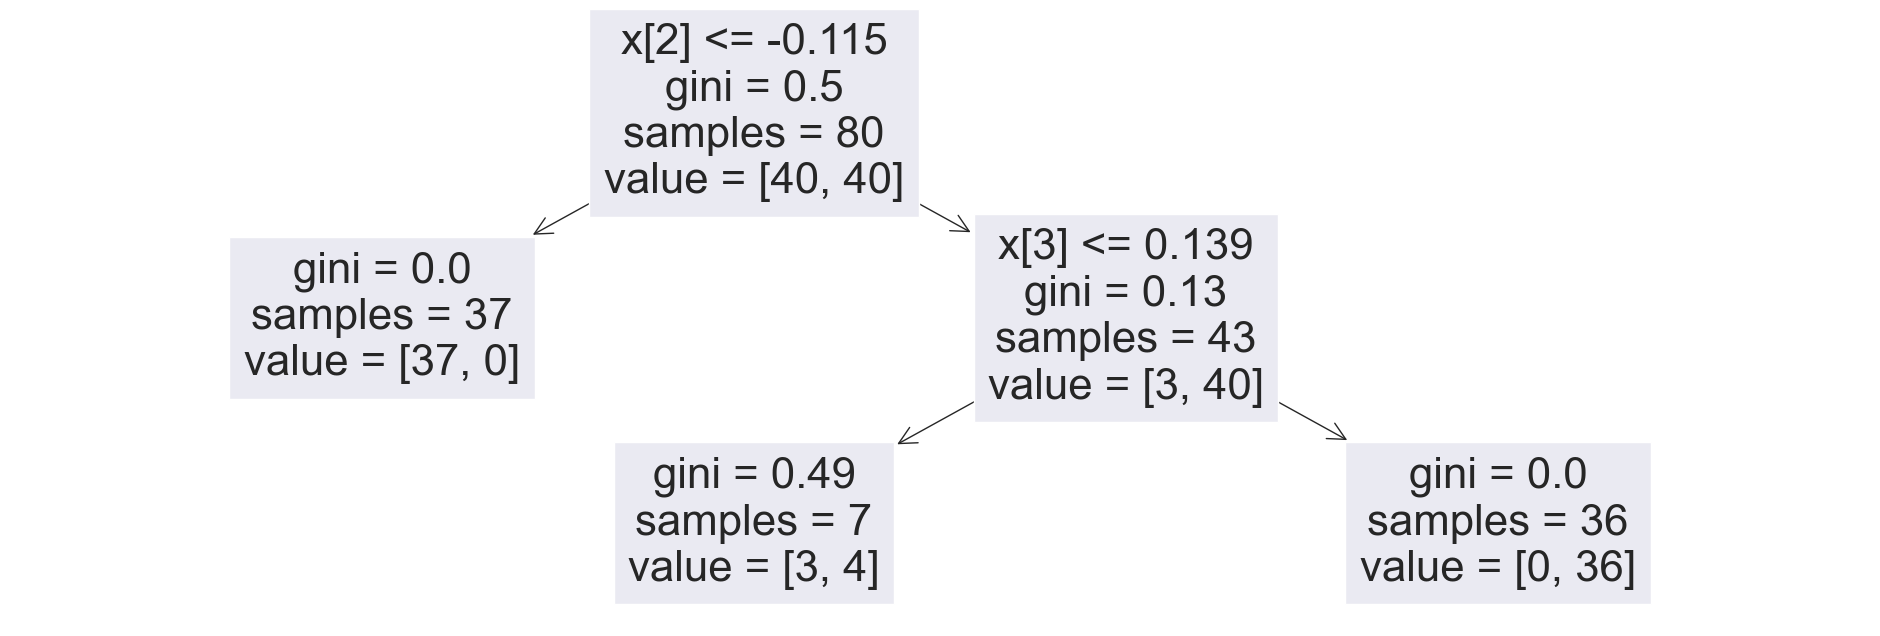

In [188]:
plt.figure(figsize=(24,8))
tree.plot_tree(best_model21.fit(X2_train_scaled,y2_train))

In [189]:
y2_pred = best_model21.predict(X2_test_scaled)

In [190]:
confusion_matrix(y2_test,y2_pred)

array([[6, 4],
       [1, 9]], dtype=int64)

In [191]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

         1.0       0.86      0.60      0.71        10
         2.0       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74        20
weighted avg       0.77      0.75      0.74        20



In [192]:
accuracy21 = best_model21.score(X2_test_scaled,y2_test) * 100
print(f'Accuracy: {accuracy21:.2f}%')

Accuracy: 75.00%


              precision    recall  f1-score   support

         1.0       0.86      0.60      0.71        10
         2.0       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74        20
weighted avg       0.77      0.75      0.74        20

Accuracy: 75.00%


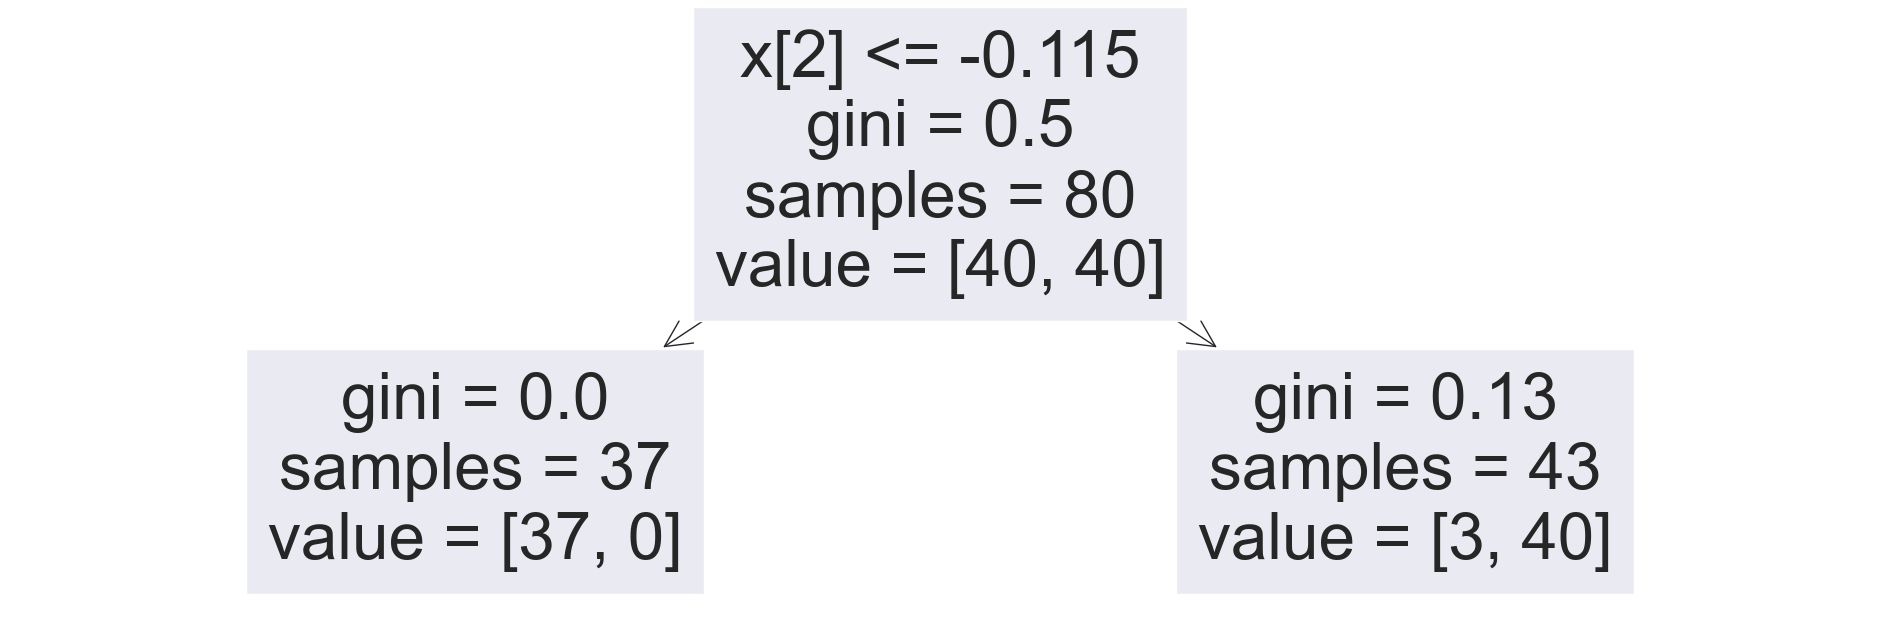

In [193]:
best_model22 = tree.DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_split=50)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model22.fit(X2_train_scaled,y2_train))
y2_pred = best_model22.predict(X2_test_scaled)
confusion_matrix(y2_test,y2_pred)
print(classification_report(y2_test,y2_pred))
accuracy22 = best_model22.score(X2_test_scaled,y2_test) * 100
print(f'Accuracy: {accuracy22:.2f}%')

              precision    recall  f1-score   support

         1.0       0.91      1.00      0.95        10
         2.0       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

Accuracy: 95.00%


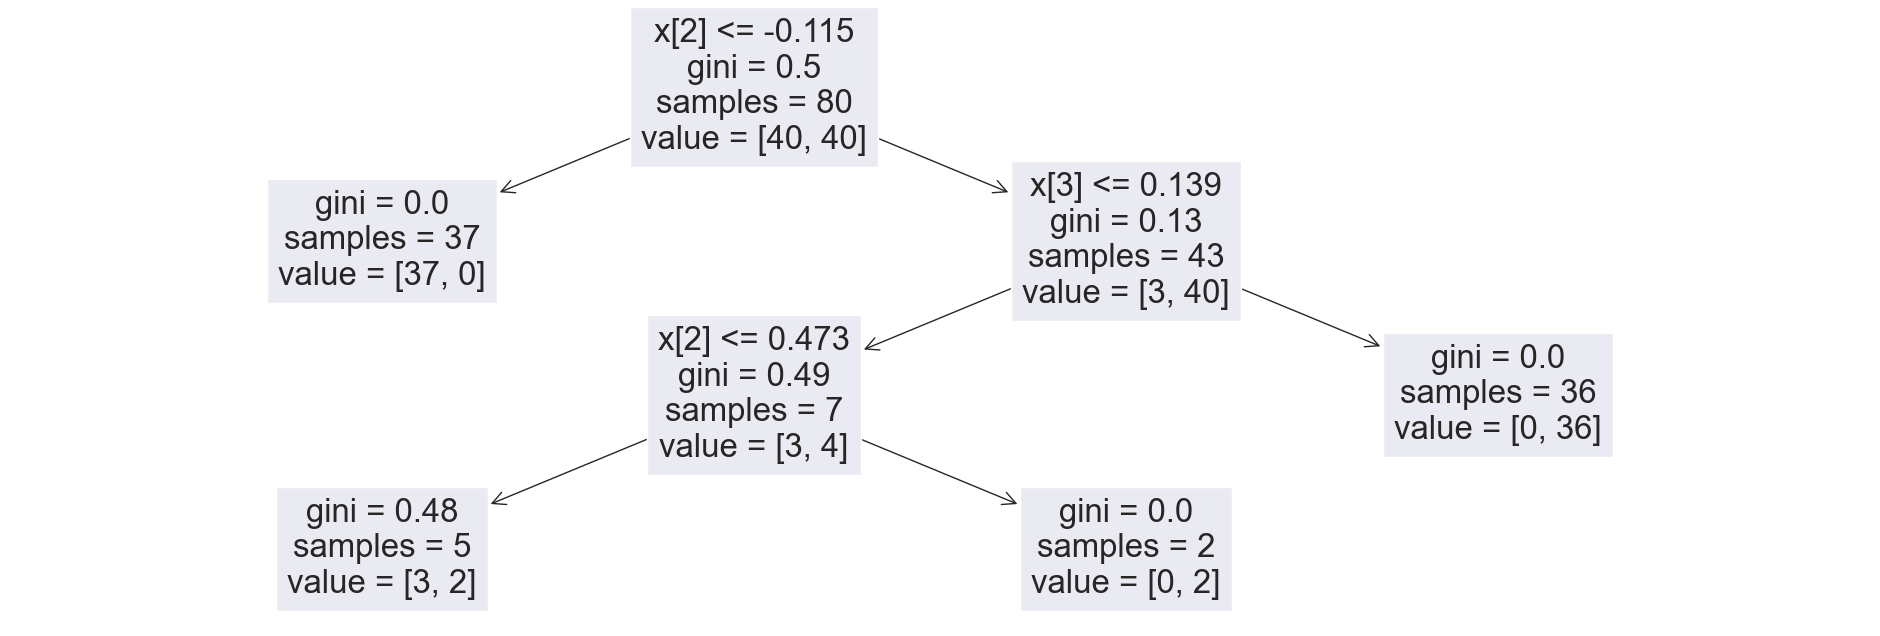

In [194]:
best_model23 = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=3)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model23.fit(X2_train_scaled,y2_train))
y2_pred = best_model23.predict(X2_test_scaled)
confusion_matrix(y2_test,y2_pred)
print(classification_report(y2_test,y2_pred))
accuracy23 = best_model23.score(X2_test_scaled,y2_test) * 100
print(f'Accuracy: {accuracy23:.2f}%')

In [195]:
best_model31 = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=37)

[Text(0.5, 0.75, 'x[2] <= -0.052\ngini = 0.498\nsamples = 60\nvalue = [32, 28]'),
 Text(0.25, 0.25, 'gini = 0.062\nsamples = 31\nvalue = [30, 1]'),
 Text(0.75, 0.25, 'gini = 0.128\nsamples = 29\nvalue = [2, 27]')]

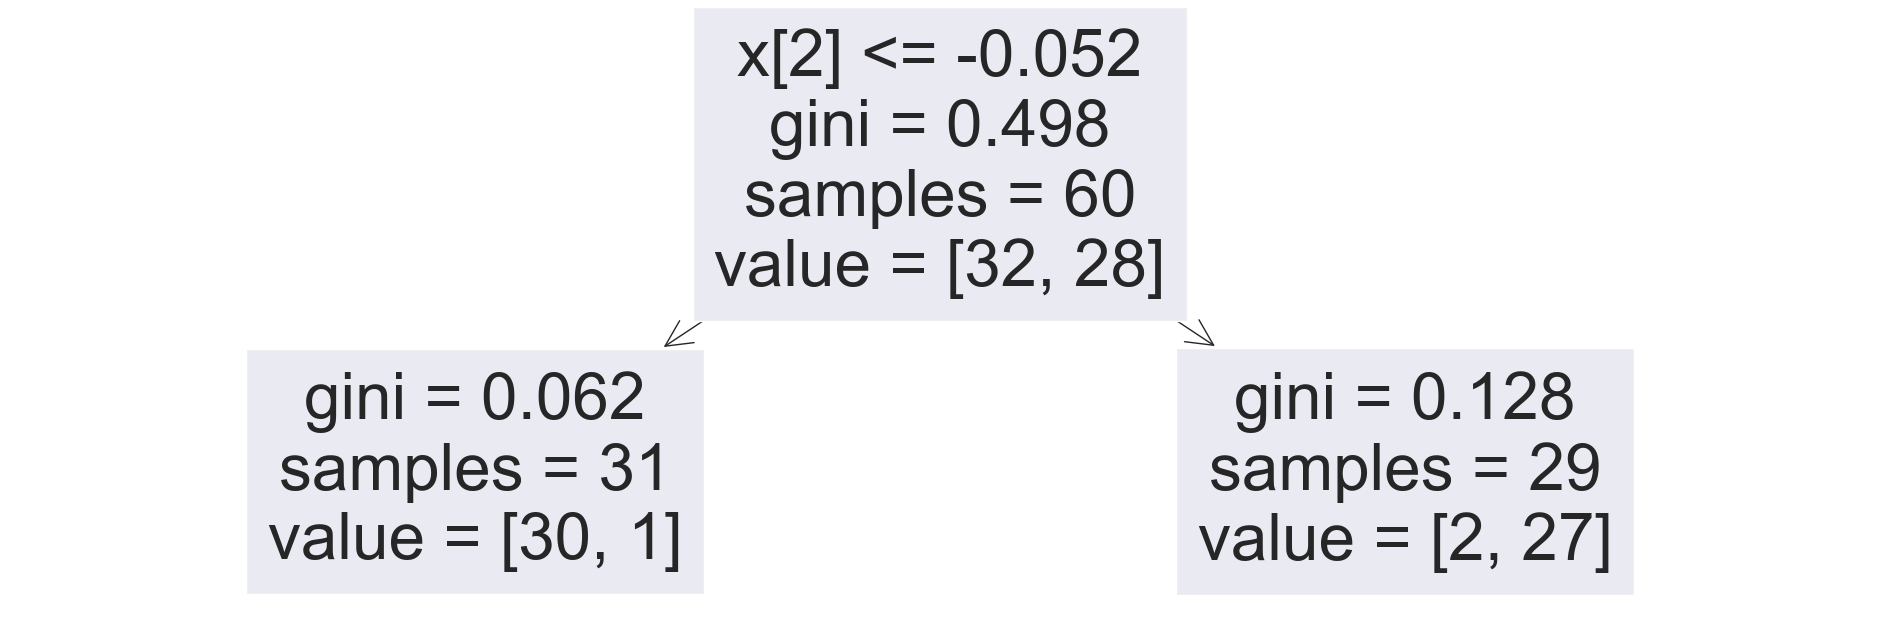

In [196]:
plt.figure(figsize=(24,8))
tree.plot_tree(best_model31.fit(X3_train_scaled,y3_train))

In [197]:
y3_pred = best_model31.predict(X3_test_scaled)

In [198]:
confusion_matrix(y3_test,y3_pred)

array([[16,  2],
       [ 2, 20]], dtype=int64)

In [199]:
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

         1.0       0.89      0.89      0.89        18
         2.0       0.91      0.91      0.91        22

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



In [200]:
accuracy31 = best_model31.score(X3_test_scaled,y3_test) * 100
print(f'Accuracy: {accuracy31:.2f}%')

Accuracy: 90.00%


In [201]:
best_model32 = tree.DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_split=50)

[Text(0.5, 0.75, 'x[2] <= -0.052\ngini = 0.498\nsamples = 60\nvalue = [32, 28]'),
 Text(0.25, 0.25, 'gini = 0.062\nsamples = 31\nvalue = [30, 1]'),
 Text(0.75, 0.25, 'gini = 0.128\nsamples = 29\nvalue = [2, 27]')]

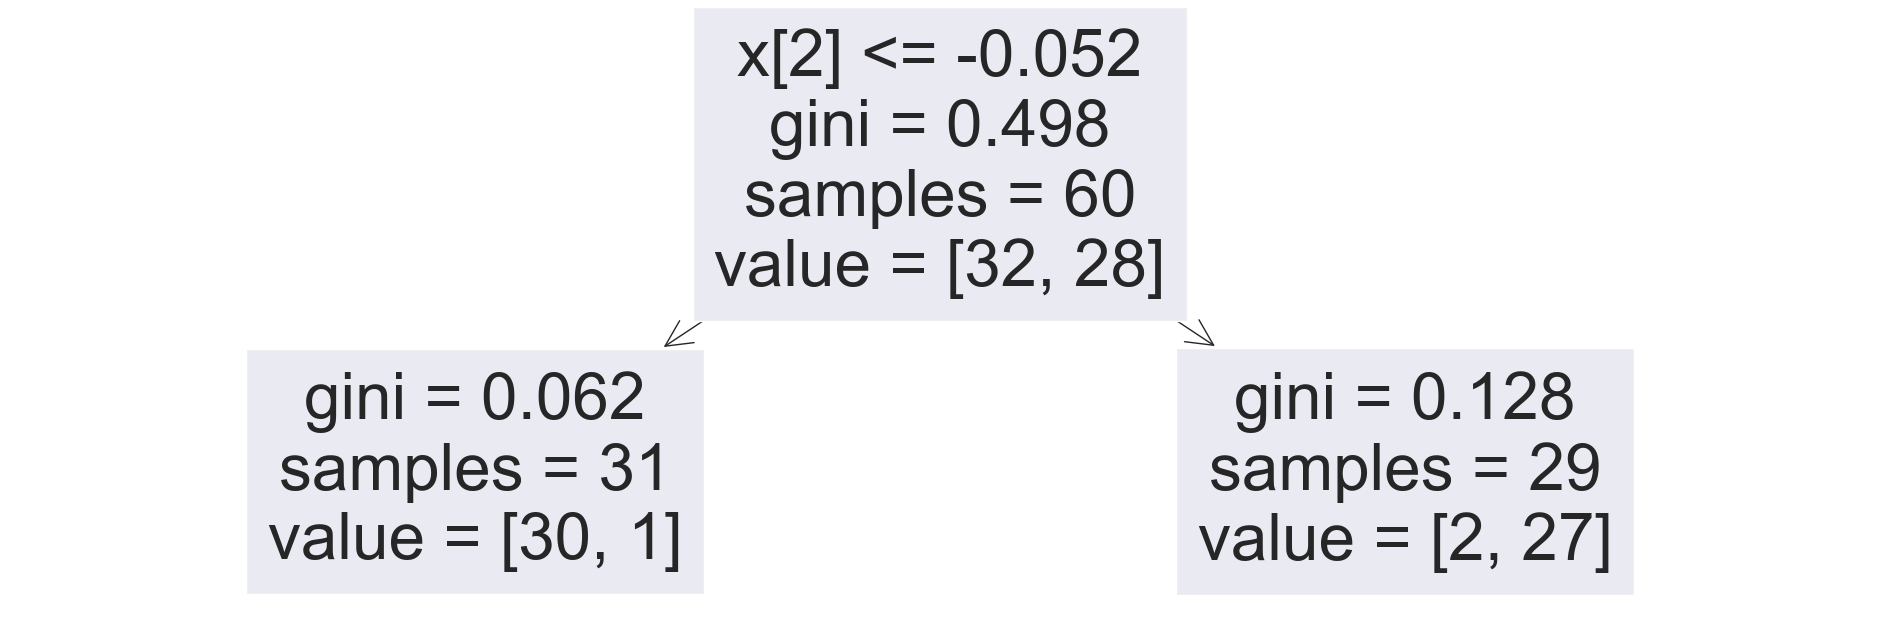

In [202]:
plt.figure(figsize=(24,8))
tree.plot_tree(best_model32.fit(X3_train_scaled,y3_train))

In [203]:
y3_pred = best_model32.predict(X3_test_scaled)

In [204]:
confusion_matrix(y3_test,y3_pred)

array([[16,  2],
       [ 2, 20]], dtype=int64)

In [205]:
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

         1.0       0.89      0.89      0.89        18
         2.0       0.91      0.91      0.91        22

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



In [206]:
accuracy32 = best_model32.score(X3_test_scaled,y3_test) * 100
print(f'Accuracy: {accuracy32:.2f}%')

Accuracy: 90.00%


              precision    recall  f1-score   support

         1.0       0.80      0.89      0.84        18
         2.0       0.90      0.82      0.86        22

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.86      0.85      0.85        40

Accuracy: 85.00%


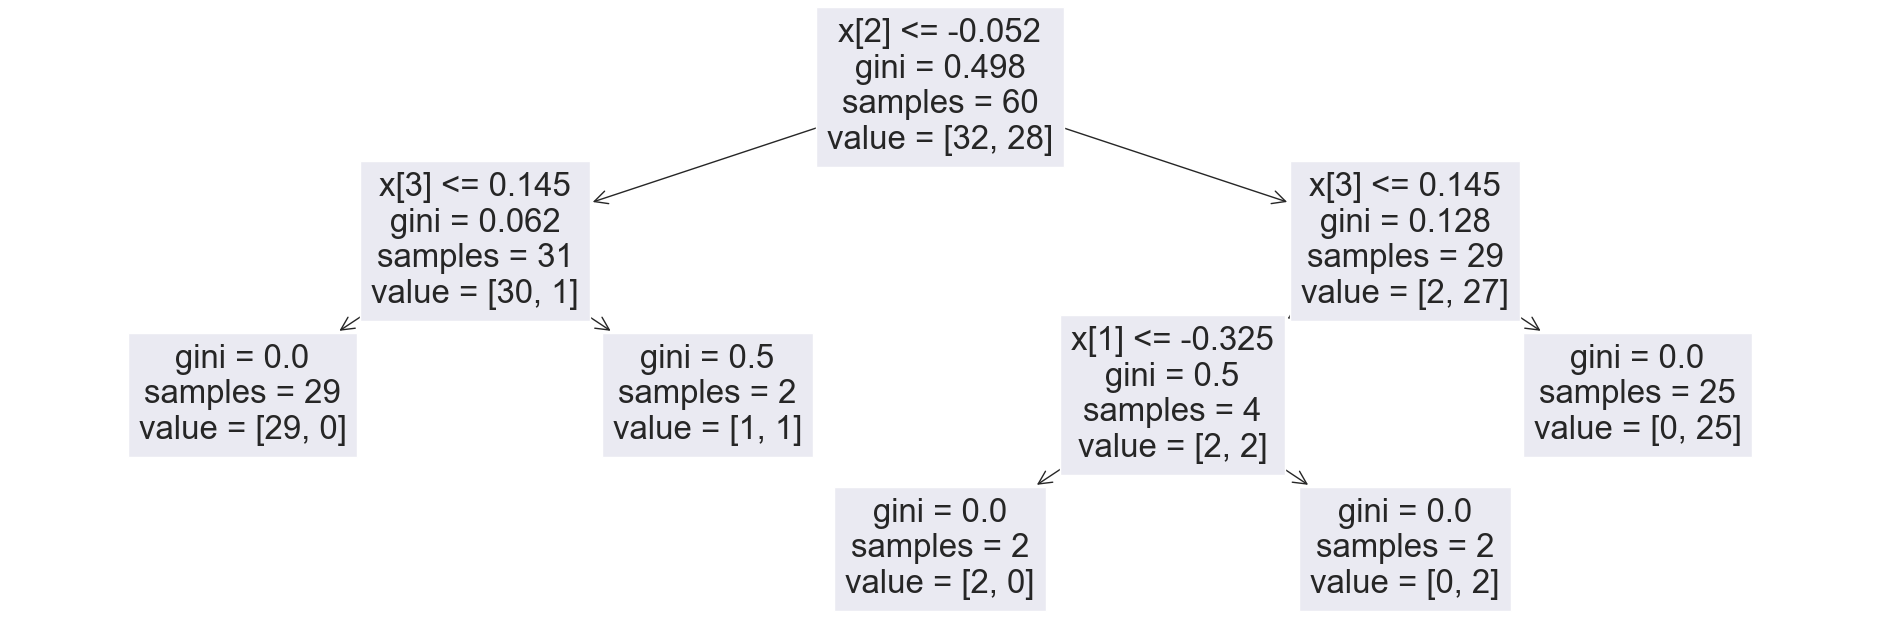

In [207]:
best_model33 = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=3)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model33.fit(X3_train_scaled,y3_train))
y3_pred = best_model33.predict(X3_test_scaled)
confusion_matrix(y3_test,y3_pred)
print(classification_report(y3_test,y3_pred))
accuracy33 = best_model33.score(X3_test_scaled,y3_test) * 100
print(f'Accuracy: {accuracy33:.2f}%')

              precision    recall  f1-score   support

         1.0       1.00      0.94      0.97        16
         2.0       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 96.67%


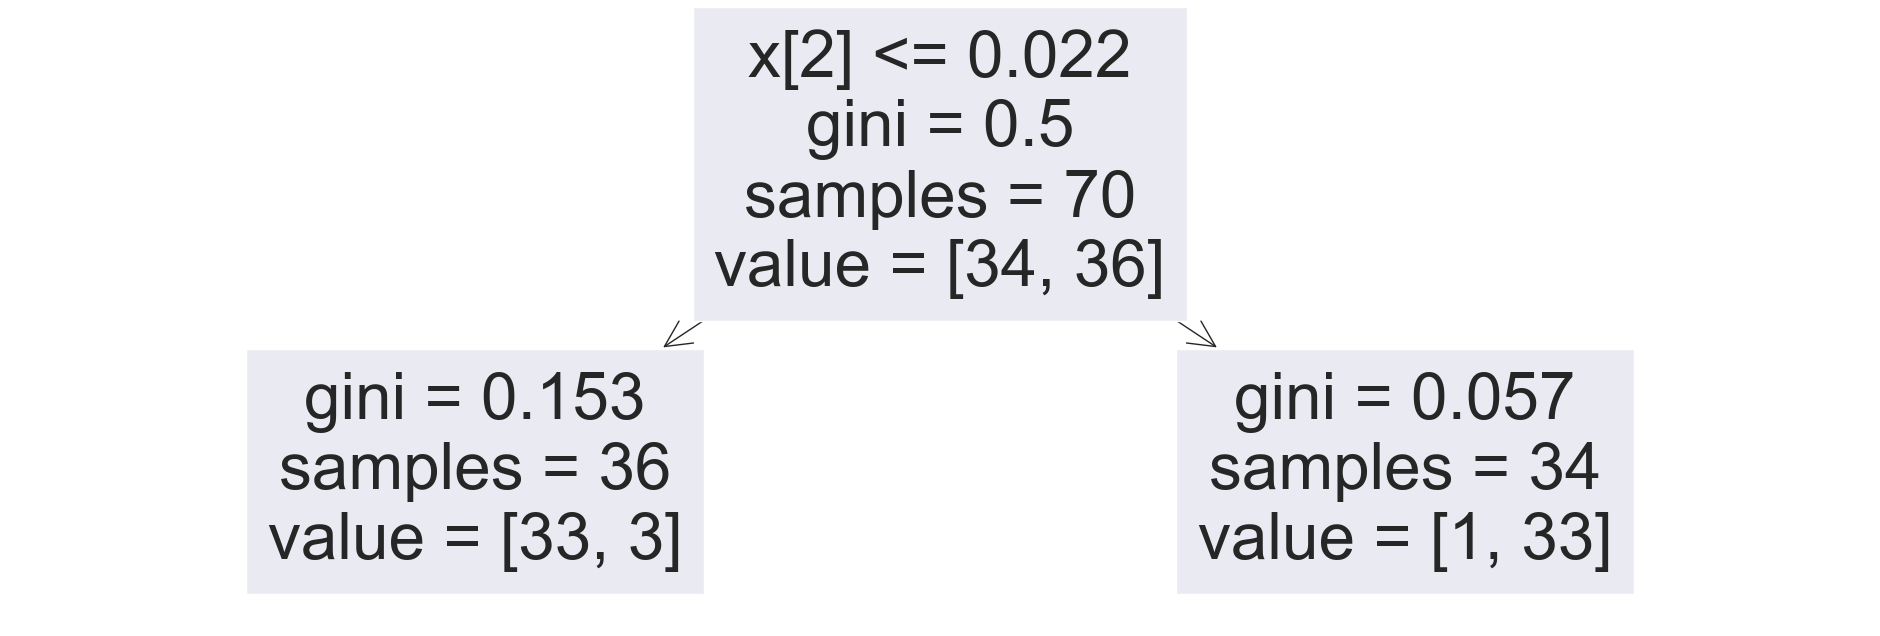

In [208]:
best_model41 = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=37)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model41.fit(X4_train_scaled,y4_train))
y4_pred = best_model41.predict(X4_test_scaled)
confusion_matrix(y4_test,y4_pred)
print(classification_report(y4_test,y4_pred))
accuracy41 = best_model41.score(X4_test_scaled,y4_test) * 100
print(f'Accuracy: {accuracy41:.2f}%')

              precision    recall  f1-score   support

         1.0       1.00      0.94      0.97        16
         2.0       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 96.67%


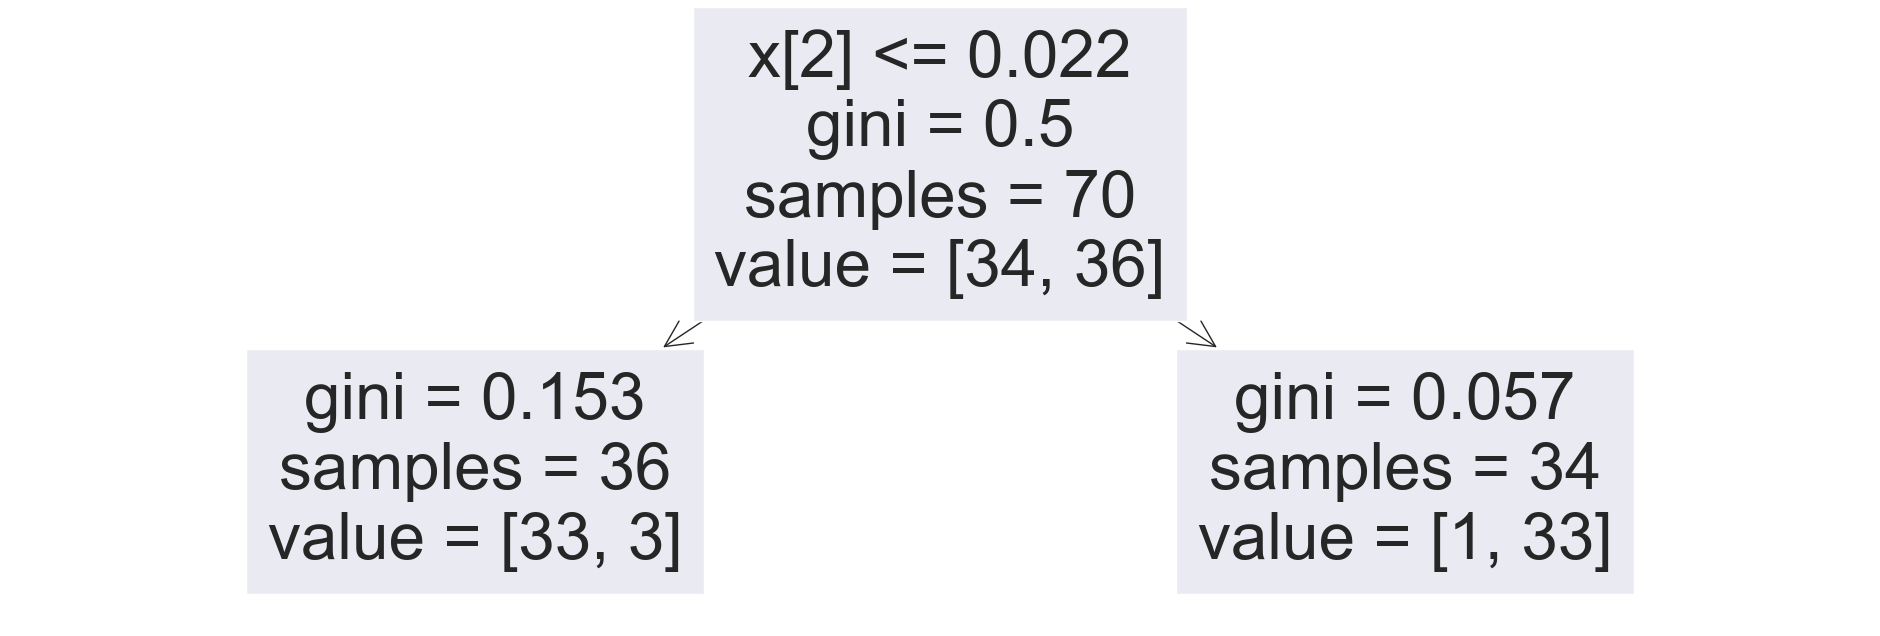

In [209]:
best_model42 = tree.DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_split=50)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model42.fit(X4_train_scaled,y4_train))
y4_pred = best_model42.predict(X4_test_scaled)
confusion_matrix(y4_test,y4_pred)
print(classification_report(y4_test,y4_pred))
accuracy42 = best_model42.score(X4_test_scaled,y4_test) * 100
print(f'Accuracy: {accuracy42:.2f}%')

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        16
         2.0       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 100.00%


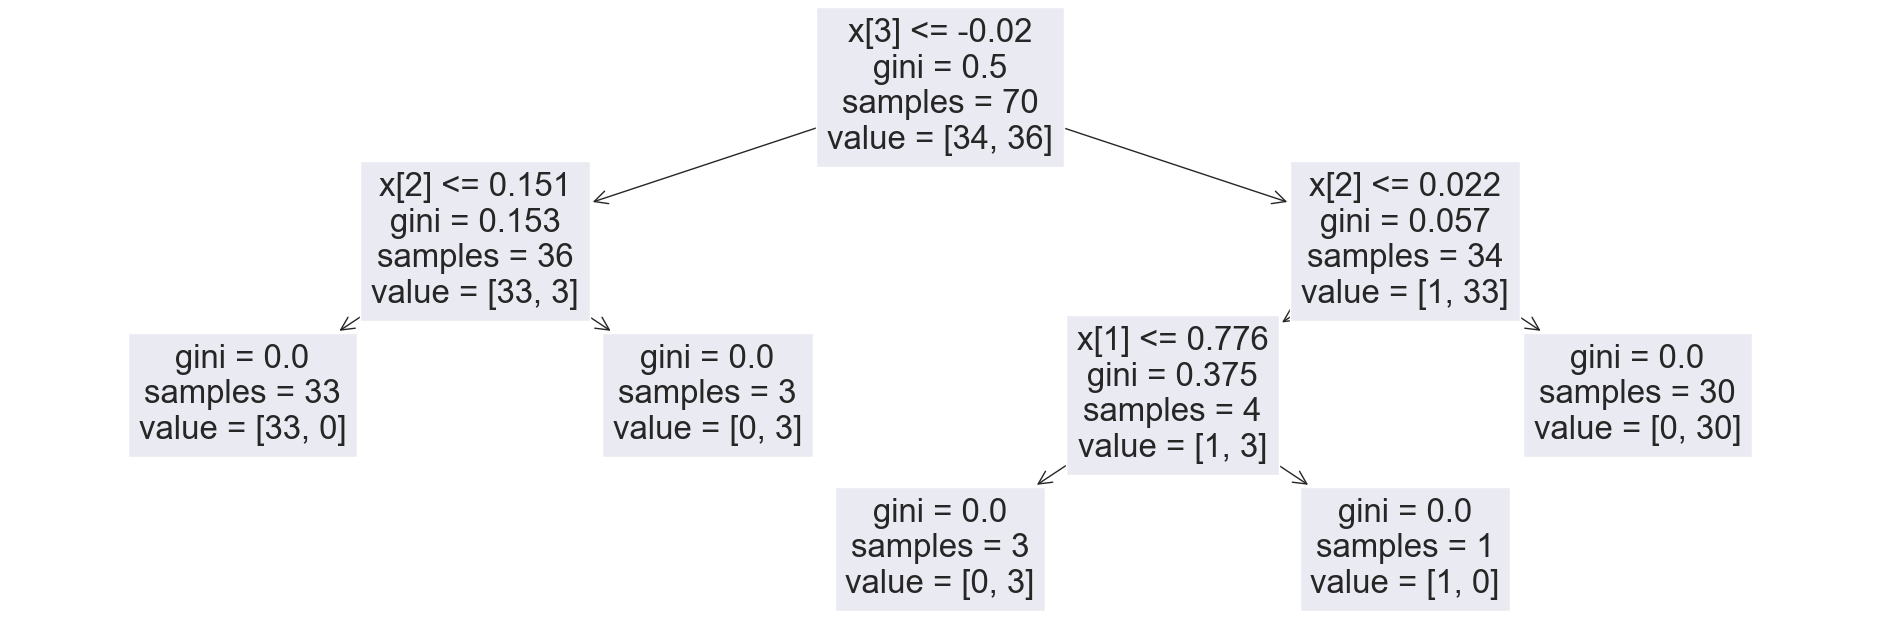

In [210]:
best_model43 = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=3)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model43.fit(X4_train_scaled,y4_train))
y4_pred = best_model43.predict(X4_test_scaled)
confusion_matrix(y4_test,y4_pred)
print(classification_report(y4_test,y4_pred))
accuracy43 = best_model43.score(X4_test_scaled,y4_test) * 100
print(f'Accuracy: {accuracy43:.2f}%')

In [211]:
data = {
    '': ['max1', 'max2', 'max3', 'Average Accuracy'],
    'x1:test_size=0.2, random_state=30': [accuracy11, accuracy12, accuracy13, (accuracy11+accuracy12+accuracy13)/3],
    'x2:test_size=0.2, random_state=20': [accuracy21, accuracy22, accuracy23, (accuracy21+accuracy22+accuracy23)/3],
    'x3:test_size=0.4, random_state=33': [accuracy31, accuracy32, accuracy33, (accuracy31+accuracy32+accuracy33)/3],
    'x4:test_size=0.3, random_state=41': [accuracy41, accuracy42, accuracy43,(accuracy41+accuracy42+accuracy43)/3]
}


df2 = pd.DataFrame(data)


# data2.set_index('', inplace=True)
# data2['Average Accuracy'] = data2.mean(axis=1)
# average_accuracy_overall = data2.mean().mean()
df2

,,"x1:test_size=0.2, random_state=30","x2:test_size=0.2, random_state=20","x3:test_size=0.4, random_state=33","x4:test_size=0.3, random_state=41"
0,max1,90.000000,75.000000,90.000000,96.666667
1,max2,90.000000,75.000000,90.000000,96.666667
2,max3,95.000000,95.000000,85.000000,100.000000
3,Average Accuracy,91.666667,81.666667,88.333333,97.777778


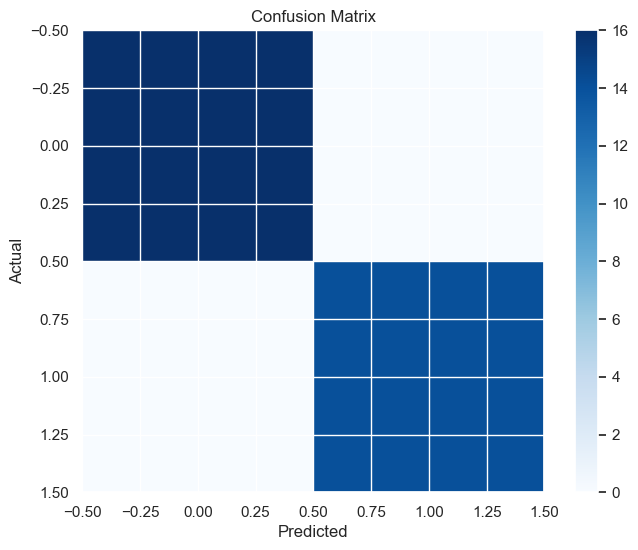

In [213]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# confusion matrix
y4_pred = best_model43.predict(X4_test_scaled)
cm = confusion_matrix(y4_test, y4_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()